In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as  nx
import math
import time

%matplotlib notebook

#loading the data
df = pd.read_csv("TSP.csv", names = ["S.No.", "Lat", "Long"], index_col = None )
df = df.dropna(how = "any")
df['S.No.'] = pd.to_numeric(df['S.No.'])
#df.dtypes
df

,S.No.,Lat,Long
0,1,11003.6111,42102.5000
1,2,11108.6111,42373.8889
2,3,11133.3333,42885.8333
3,4,11155.8333,42712.5000
4,5,11183.3333,42933.3333
5,6,11297.5000,42853.3333
6,7,11310.2778,42929.4444
7,8,11416.6667,42983.3333
8,9,11423.8889,43000.2778
9,10,11438.3333,42057.2222


<IPython.core.display.Javascript object>


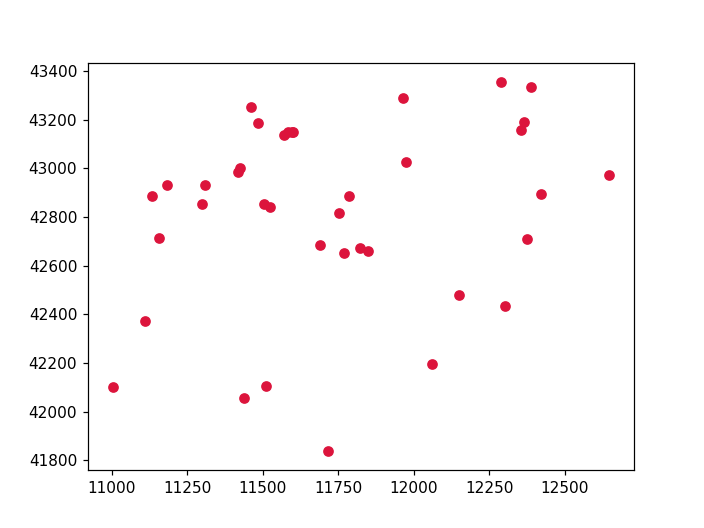

In [2]:
# separating the lat and long
X = df['Lat']
Y = df['Long']
Key_point = df['S.No.']

#drawing the points
plt.figure()
plt.scatter(X,Y, c= "#dc143c")

In [74]:
def Solver(start_point, key_list, key_point):
    start_time = time.time()
    cost = 0
    first_state = start_point
    while(len(key_list)>1):
        path.append(start_point)
        current_point = start_point
        key_list.remove(start_point)
       # print(start_point)
        key_euclid = populate_key_euc(current_point, key_list, df, key_point)
        distances = [sublist[1] for sublist in key_euclid]
        elements = [sublist[0] for sublist in key_euclid]
        min_distance = min(distances)
        cost = cost + min_distance
        indexx = distances.index(min_distance)
        start_point = elements[indexx]
      #  print(distances, indexx)
    
    
    cur_lat = X[first_state-1]
    cur_long = Y[first_state-1]
    element_index = key_point.index(key_list[0])
    go_lat = X[element_index]
    go_long = Y[element_index]
    dist_last_to_first =  math.sqrt((cur_lat-go_lat)**2 + (cur_long-go_long)**2)
    path.append(key_list[0])
    path.append(first_state)
    cost = cost + dist_last_to_first
    print("Path is :",path)    
    print("Time taken:",time.time()-start_time,"seconds")
    print(cost)
    return (start_point, path, cost)

In [75]:
def populate_key_euc(current_point, key_list, df, key_point):
    key_euclid = []
    #print(current_point)
    current_point_index = key_point.index(current_point)
    cur_lat = X[current_point_index]
    cur_long = Y[current_point_index]
    for element in key_list:
        element_index = key_point.index(element)
        go_lat = X[element_index]
        go_long = Y[element_index]
        euclidian_dist = math.sqrt((cur_lat-go_lat)**2 + (cur_long-go_long)**2)
        key_euclid.append([element, euclidian_dist])
    return key_euclid    

In [90]:
startt_point = int(input("Insert a point to start:\t"))
start_point = startt_point
key_list = list(Key_point) # used as a checklist
key_point = list(Key_point)
path = []
result = Solver(start_point, key_list, key_point)

Insert a point to start:	19
Path is : [19, 18, 17, 16, 12, 11, 9, 8, 7, 6, 5, 3, 4, 2, 1, 10, 14, 21, 29, 30, 32, 35, 37, 38, 33, 34, 36, 31, 27, 28, 24, 22, 20, 23, 25, 26, 15, 13, 19]
Time taken: 0.024494409561157227 seconds
6770.07692171576


In [86]:
total_dist = []
paths = []
key_point = list(Key_point)
costs = []
for i in range (1,39):
    path = []
    key_list = list(Key_point) # used as a checklist
    result = Solver(i, key_list, key_point)    
    paths.append(result[1])
    costs.append(result[2])
print(costs.index(min(costs))+1)    

Path is : [1, 2, 4, 3, 5, 7, 6, 8, 9, 13, 15, 20, 23, 25, 26, 22, 24, 28, 27, 31, 36, 34, 33, 37, 35, 32, 30, 29, 21, 14, 10, 16, 17, 18, 19, 12, 11, 38, 1]
Time taken: 0.021008968353271484 seconds
9748.94670516838
Path is : [2, 1, 10, 14, 21, 29, 30, 32, 35, 37, 38, 33, 34, 36, 31, 27, 28, 24, 22, 20, 23, 25, 26, 15, 13, 8, 9, 7, 6, 5, 3, 4, 12, 11, 16, 17, 18, 19, 2]
Time taken: 0.023966550827026367 seconds
7589.242640655293
Path is : [3, 5, 7, 6, 8, 9, 13, 15, 20, 23, 25, 26, 22, 24, 28, 27, 31, 36, 34, 33, 37, 35, 32, 30, 29, 21, 14, 10, 1, 2, 4, 12, 11, 16, 17, 18, 19, 38, 3]
Time taken: 0.024985551834106445 seconds
9039.816740489334
Path is : [4, 3, 5, 7, 6, 8, 9, 13, 15, 20, 23, 25, 26, 22, 24, 28, 27, 31, 36, 34, 33, 37, 35, 32, 30, 29, 21, 14, 10, 1, 2, 16, 17, 18, 19, 12, 11, 38, 4]
Time taken: 0.015288829803466797 seconds
9301.676605188615
Path is : [5, 3, 6, 7, 8, 9, 13, 15, 20, 23, 25, 26, 22, 24, 28, 27, 31, 36, 34, 33, 37, 35, 32, 30, 29, 21, 14, 10, 1, 2, 4, 12, 11, 16,

In [81]:
i = 1
result = Solver(i, key_list, key_point)  

Path is : [18, 19, 17, 16, 12, 11, 9, 8, 7, 6, 5, 3, 4, 2, 1, 10, 14, 21, 29, 30, 32, 35, 37, 38, 33, 34, 36, 31, 27, 28, 24, 22, 20, 23, 25, 26, 15, 13, 18, 13, 1]
Time taken: 0.0009996891021728516 seconds
903.3931728506114


In [82]:
key_list

[13]